In [1]:
%pylab inline
import numpy as np
np.set_printoptions(precision=6, linewidth=110)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import scipy.interpolate as interpolate
# import scipy.integrate as integrate
# import scipy.optimize as optimize

import pycbc.filter
import pycbc.types
import pycbc.psd

Populating the interactive namespace from numpy and matplotlib



In [2]:
sys.path.insert(0, '../src')

import waveform as wave
import waveformset as ws
import surrogate
import diagnostics
import plotparams

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(surrogate)
imp.reload(diagnostics)
imp.reload(plotparams)

import constants
imp.reload(constants)
from constants import *

# Histogram of errors

In [4]:
# Load errors data
errors_lhd = np.loadtxt('../data/flowp00015/errors_test_set2_lhd.txt')
errors_uncsamp = np.loadtxt('../data/flowp00015/errors_test_set2_lhd_uncsamp.txt')
errors_rand = np.loadtxt('../data/flowp00015/errors_test_set2_lhd_uncsamp_rand.txt')

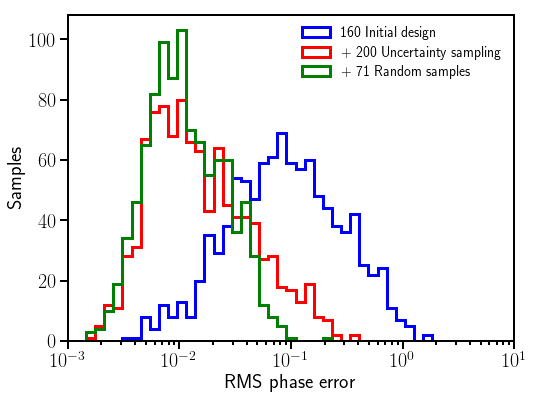

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('RMS phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

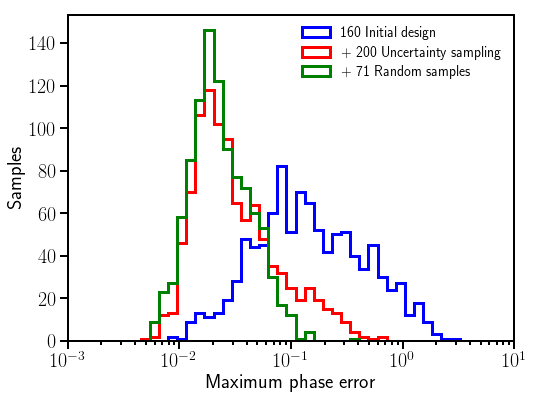

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('Maximum phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

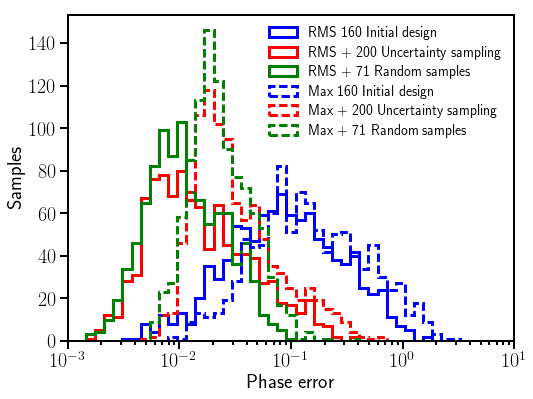

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'RMS 160 Initial design')
ax.hist(errors_uncsamp[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'RMS + 200 Uncertainty sampling')
ax.hist(errors_rand[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'RMS + 71 Random samples')

ax.hist(errors_lhd[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='--', lw=3, color='blue', alpha=1.0, label=r'Max 160 Initial design')
ax.hist(errors_uncsamp[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='--', lw=3, color='red', alpha=1.0, label=r'Max + 200 Uncertainty sampling')
ax.hist(errors_rand[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='--', lw=3, color='green', alpha=1.0, label=r'Max + 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('Phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

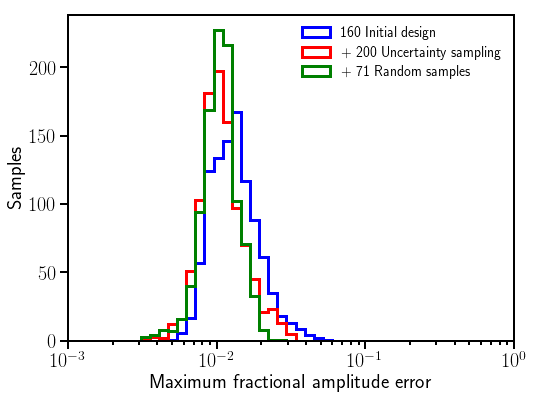

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-3, 1.0])
ax.set_xlabel('Maximum fractional amplitude error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

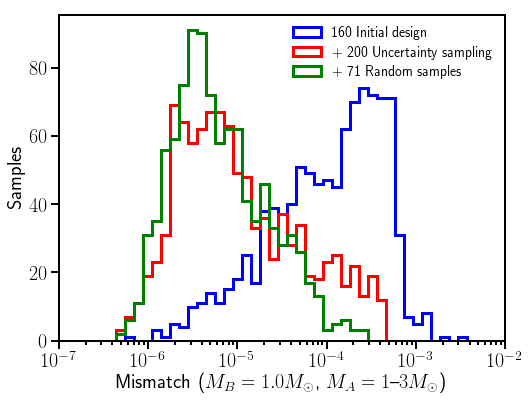

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-7, 1.0e-2])
ax.set_xlabel(r'Mismatch ($M_B=1.0M_\odot$, $M_A=1$--$3M_\odot$)')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

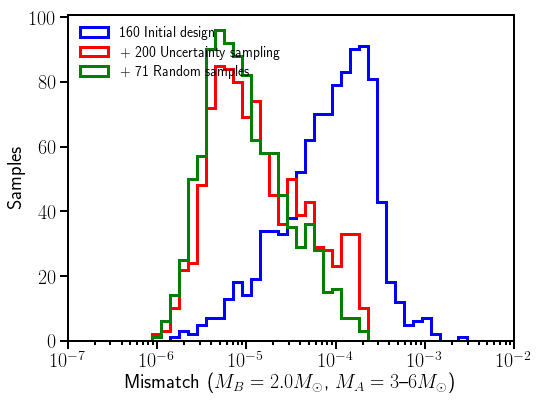

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 9], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 9], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 9], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-7, 1.0e-2])
ax.set_xlabel(r'Mismatch ($M_B=2.0M_\odot$, $M_A=3$--$6M_\odot$)')
ax.set_ylabel('Samples')
ax.legend(loc='upper left', frameon=False)

# Sampled parameters

In [21]:
trainset = ws.HDF5WaveformSet('../data/flowp00015/dh_training_set_lhd_uncsamp_rand.hdf5')
params_all = trainset.parameters()

In [22]:
params_lhd = params_all[:160]
params_uncsamp = params_all[160:360]
params_rand = params_all[360:]
len(params_lhd), len(params_uncsamp), len(params_rand)

(160, 200, 71)

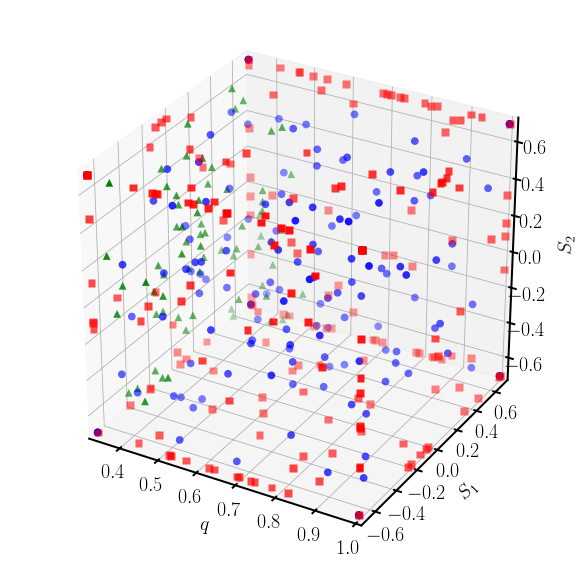

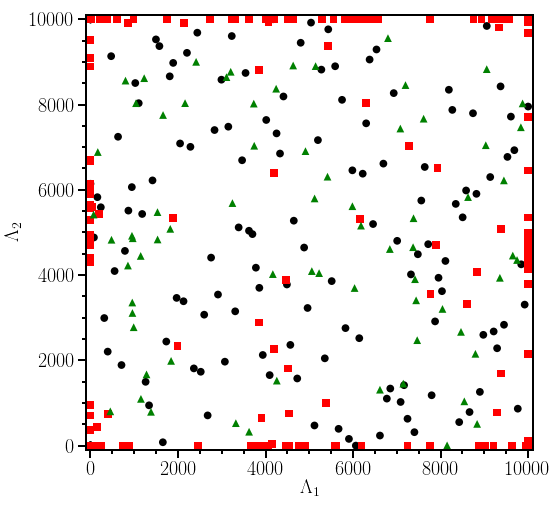

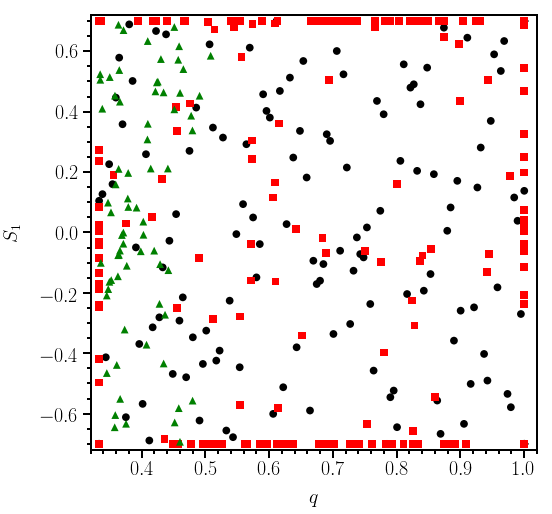

In [26]:
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d')

x, y, z = params_lhd[:, 0], params_lhd[:, 1], params_lhd[:, 2]
axes.scatter(x, y, z, c='b', edgecolor='none', marker='o', s=60)

x, y, z = params_uncsamp[:, 0], params_uncsamp[:, 1], params_uncsamp[:, 2]
axes.scatter(x, y, z, c='r', edgecolor='none', marker='s', s=60)

x, y, z = params_rand[:, 0], params_rand[:, 1], params_rand[:, 2]
axes.scatter(x, y, z, c='g', edgecolor='none', marker='^', s=60)

axes.set_xlim(0.333, 1.0)
axes.set_ylim(-0.7, 0.7)
axes.set_zlim(-0.7, 0.7)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.set_zlabel('$S_2$', labelpad=18)


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_lhd[:, 3], params_lhd[:, 4]
axes.scatter(x, y, c='b', edgecolor='none', marker='o', s=60)

x, y = params_uncsamp[:, 3], params_uncsamp[:, 4]
axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=60)

x, y = params_rand[:, 3], params_rand[:, 4]
axes.scatter(x, y, c='g', edgecolor='none', marker='^', s=60)

axes.set_xlim(-100, 10100)
axes.set_ylim(-100, 10100)
axes.set_xlabel('$\Lambda_1$')
axes.set_ylabel('$\Lambda_2$')
axes.minorticks_on()


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_lhd[:, 0], params_lhd[:, 1]
axes.scatter(x, y, c='b', edgecolor='none', marker='o', s=60)

x, y = params_uncsamp[:, 0], params_uncsamp[:, 1]
axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=60)

x, y = params_rand[:, 0], params_rand[:, 1]
axes.scatter(x, y, c='g', edgecolor='none', marker='^', s=60)

axes.set_xlim(0.32, 1.02)
axes.set_ylim(-0.72, 0.72)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.minorticks_on()

In [30]:
uncsamp_estimate = np.loadtxt('../data/flowp00015/uncertainty_sampling_from_lhd_trainset.txt')
uncsamp_estimate

array([[  6.797632e-01,  -7.000000e-01,   7.000000e-01,   0.000000e+00,   0.000000e+00,   2.054832e+00],
       [  6.952335e-01,  -7.000000e-01,  -7.000000e-01,   1.000000e+04,   9.672985e+03,   2.392632e+00],
       [  7.885334e-01,   7.000000e-01,   7.000000e-01,   1.000000e+04,   1.000000e+04,   1.644745e+00],
       ..., 
       [  5.545651e-01,  -2.782596e-01,   6.999998e-01,   7.373530e+02,   1.262027e-03,   5.858795e-01],
       [  1.000000e+00,  -2.075426e-01,  -7.000000e-01,   4.826631e+03,   0.000000e+00,   5.399372e-01],
       [  1.000000e+00,   4.113417e-02,  -2.318576e-01,   5.550762e+03,   1.000000e+04,   5.763764e-01]])

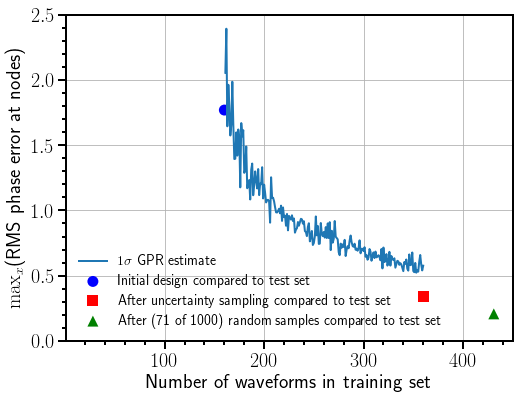

In [45]:
fig, axes = plt.subplots(1, figsize=(8, 6))

axes.plot(range(161, len(uncsamp_estimate)+161), uncsamp_estimate[:, 5], lw=2, label=r'$1\sigma$ GPR estimate')

max_lhd = np.max(errors_lhd[:, 5])
axes.scatter(160, max_lhd, c='b', edgecolor='none', marker='o', s=120, label='Initial design compared to test set')

max_uncsamp = np.max(errors_uncsamp[:, 5])
axes.scatter(360, max_uncsamp, c='r', edgecolor='none', marker='s', s=120, label='After uncertainty sampling compared to test set')

max_rand = np.max(errors_rand[:, 5])
axes.scatter(431, max_rand, c='g', edgecolor='none', marker='^', s=120, label='After (71 of 1000) random samples compared to test set')

axes.set_xlabel('Number of waveforms in training set')
axes.set_ylabel(r'$\max_x$(RMS phase error at nodes)')
axes.minorticks_on()
axes.set_xlim(1, 450)
axes.set_ylim(0, 2.5)
axes.grid()
# axes.grid(which='major')
# axes.grid(which='minor')
axes.legend(loc='lower left', frameon=False)